In [7]:
# csv 파일 생성하기

# 필요한 모듈 설치
# conda install tqdm
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge opencv

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
import cv2 as cv
from sklearn import utils
from tqdm import tqdm

In [8]:
# 파일 경로
train_dir = 'C://jupyter_home/data/cat_dog/train/'

# 함수 생성
# 파일 이름이 cat으로 시작하면 0을 리턴
# 파일 이름이 dog으로 시작하면 1을 리턴

def labeling(img):
    class_name = img.split('.')[0]
    if class_name == 'cat':
        return 0
    elif class_name == 'dog':
        return 1
    
# label data 와 pixel data를 담을 변수
x_data = []
t_data = []

# 모든 파일에 대해서 반복 처리
for img in tqdm(os.listdir(train_dir)): 
#                 total=len(os.listdir(train_dir)),
#                 position=0,
#                 leave=True):
    
    # labeling 함수 이용
    label_data = labeling(img)
    
    # Image 파일의 경로 필요
    # C://jupyter_home/data/cat_dog/train/cat.0.jpg
    path = os.path.join(train_dir, img)
    
    # Image 파일을 ndarray로 불러오기 - opencv 이용 (cv2.imread())
    # 형태만 필요 -> 흑백 이미지로 불러오기 (옵션 설정)
    # pixel size 조절 (CNN은 입력 이미지가 같은 크기여야 한다)
    # resizing할 크기 결정
    img_data = cv.resize(cv.imread(path, cv.IMREAD_GRAYSCALE), (80, 80))
    
    # list에 담기
    t_data.append(label_data) # [0, 0, 0, ..., 1, 1, 1, ...]
    x_data.append(img_data.ravel()) # [[], [], [], [], [], ...]

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:18<00:00, 1359.38it/s]


In [9]:
print(len(t_data), len(x_data))

25000 25000


In [11]:
t_df = pd.DataFrame({
    'label': t_data 
})
t_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [13]:
x_df = pd.DataFrame(x_data)
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,169,174,180,184,188,191,196,198,201,203,...,3,3,3,3,2,2,2,2,2,2
1,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
2,42,38,45,46,58,57,54,59,48,51,...,88,126,156,165,137,135,149,162,171,154
3,220,224,225,230,223,228,230,225,228,227,...,236,232,228,204,204,203,216,221,212,213
4,114,120,115,88,96,139,127,185,130,196,...,105,101,91,95,92,97,120,89,96,84


In [16]:
# 두 개의 DataFrame 
# 지정 index가 없으니 행 인덱스는 0부터

# x_df, t_df 둘 다 행 인덱스로 merge
df = pd.merge(t_df, x_df, left_index=True, right_index=True)

# 데이터가 순차적으로 저장되어있음
# sklearn의 shuffle 기능 이용
shuffled_df = utils.shuffle(df)

# df를 CSV 파일로 저장
shuffled_df.to_csv('C:/jupyter_home/data/cat_dog/train.csv', index=False)

In [17]:
# ImageDataGenerator 사용
# 일부 이미지를 이용해서 폴더 만들기
# 일부 이미지 분리(총 4000개)

import os, shutil

original_dataset_dir = './data/cat_dog/train'

## directory 생성 ##

base_dir = 'data/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)


In [18]:
# 총 학습용 데이터량: 2000개
# validation, test 데이터량: 각 1000개

# 학습 모델의 성능은 전체 데이터를 사용할 때보다 좋지 않을 것으로 예상
# ImageDataGenerator 이용

import numpy as np
import pandas as pd
import matplotlib.pyplot as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [23]:
# 경로 설정
train_dir = './data/cat_dog_small/train/'
validation_dir = './data/cat_dog_small/validation/'

# ImageDataGenerator 생성
# Image file을 읽어서 pixel data를 추출
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator를 이용하여 폴더에서 파일을 읽어 pixel data를 생성시키는 generator 생성
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    classes=['cats', 'dogs'], # 폴더명, 먼저나온 값: 0, 나중에 나온 값:1, 생략시 폴더순(오름차순)
    target_size=(150, 150),   # Image Resize (150,150)
    batch_size=20,            # 한번에 읽어올 이미지 파일의 수, label에 상관없이 읽어옴                                                
    class_mode='binary'       # binary: 이진분류, categorical: 다중분류, sparse-: one-hot 미처리시
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir, 
    classes=['cats', 'dogs'], # 폴더명, 먼저나온 값: 0, 나중에 나온 값:1, 생략시 폴더순(오름차순)
    target_size=(150, 150),   # Image Resize (150,150)
    batch_size=20,            # 한번에 읽어올 이미지 파일의 수, label에 상관없이 읽어옴                                                
    class_mode='binary'       # binary: 이진분류, categorical: 다중분류, sparse-: one-hot 미처리시
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
for x_data, t_data in train_generator:
    print(x_data.shape)
    print(t_data.shape)
    break

(20, 150, 150, 3)
(20,)


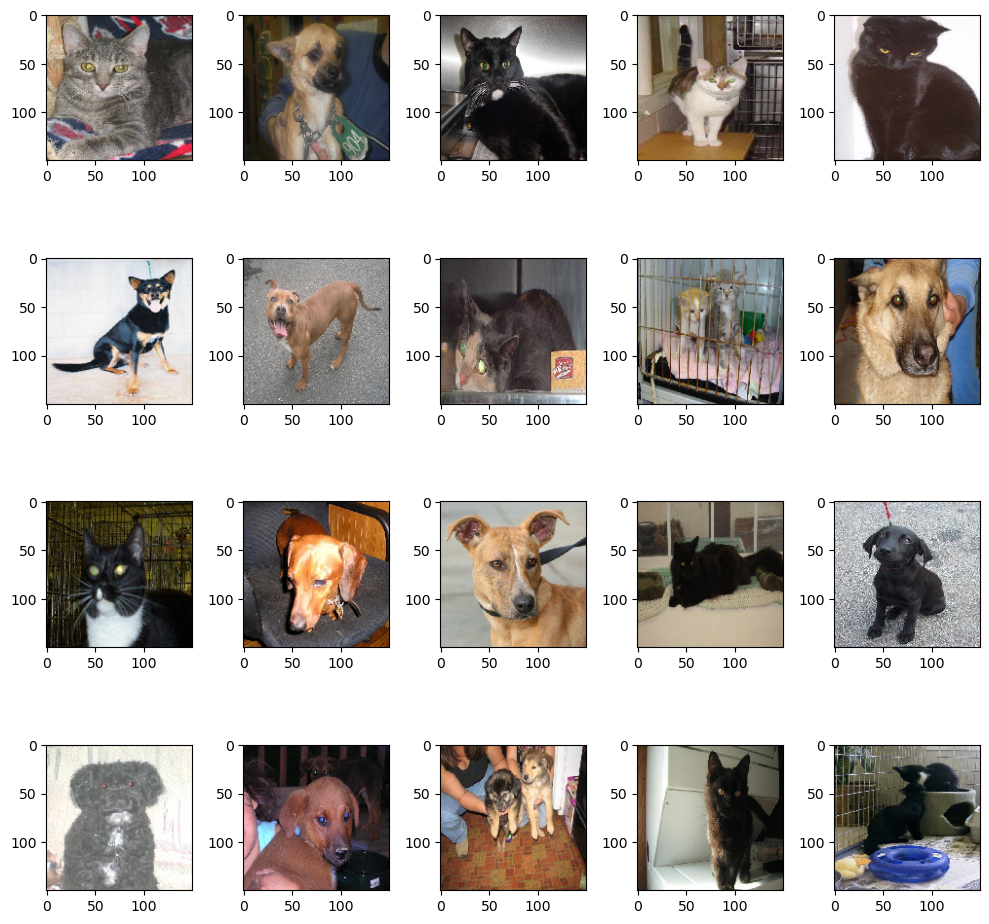

In [25]:
# 이미지 확인
fig = plt.figure(figsize=(10, 10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4, 5, i+1))
    
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)
    break
    
fig.tight_layout()
plt.show()

In [26]:
# ImageDataGenerator를 이용하여 특정 폴더로부터 이미지를 읽어서 ndarray를 리턴
# model 구현

model = Sequential()

# Feature Extraction (Convolution, Pooling)
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

# FC layer
model.add(Flatten()) # input 역할

# Dropout
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(256,
                activation='relu'))

# Output layer
model.add(Dense(1,
                activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       1

In [27]:
# model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
                             
# model 학습
model_result = model.fit(train_generator,
                         steps_per_epoch=100,
                         epochs=30,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=50)

Epoch 1/30
100/100 [==============================] - 54s 536ms/step - loss: 0.6909 - accuracy: 0.5165 - val_loss: 0.6936 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 57s 568ms/step - loss: 0.6705 - accuracy: 0.5925 - val_loss: 0.6500 - val_accuracy: 0.6160
Epoch 3/30
100/100 [==============================] - 51s 514ms/step - loss: 0.5967 - accuracy: 0.6825 - val_loss: 0.6101 - val_accuracy: 0.6670
Epoch 4/30
100/100 [==============================] - 51s 505ms/step - loss: 0.5660 - accuracy: 0.7185 - val_loss: 0.5899 - val_accuracy: 0.6890
Epoch 5/30
100/100 [==============================] - 52s 520ms/step - loss: 0.5307 - accuracy: 0.7300 - val_loss: 0.5598 - val_accuracy: 0.7030
Epoch 6/30
100/100 [==============================] - 58s 581ms/step - loss: 0.5080 - accuracy: 0.7525 - val_loss: 0.5486 - val_accuracy: 0.7020
Epoch 7/30
100/100 [==============================] - 55s 551ms/step - loss: 0.5063 - accuracy: 0.7540 - val_loss: 0.5964 - val_ac

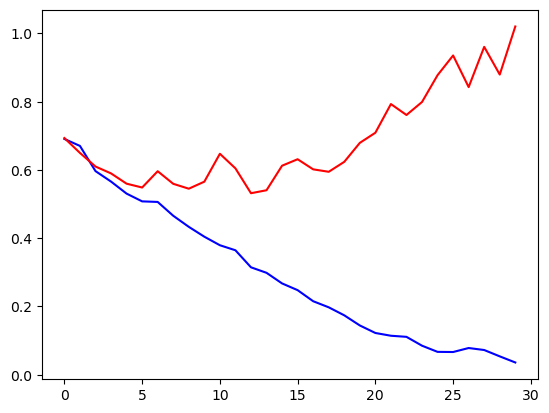

In [28]:
# history 객체를 그래프로 나타내기

plt.plot(model_result.history['loss'], color='b')
plt.plot(model_result.history['val_loss'], color='r')
plt.show()

In [ ]:
# overfitting 발생, 정확도 낮아짐
# 해결 방안
# 1. 이미지 증식 (Image Augmentation) 
#     - 이미지를 조금씩 수정하여 이미지의 개수를 늘림
#     - 기존의 이미지에 노이즈 추가 (회전, 확대, 축소, 상하좌우 이동, 상하좌우 반전 등)
#     - ImageDataGenerator를 이용하여 이미지 증식
# 2. 전이학습 (Transfer Learning)
#     - 이미지 특성을 잘 추출하는 filter(이미 잘 학습된)를 가져다 사용

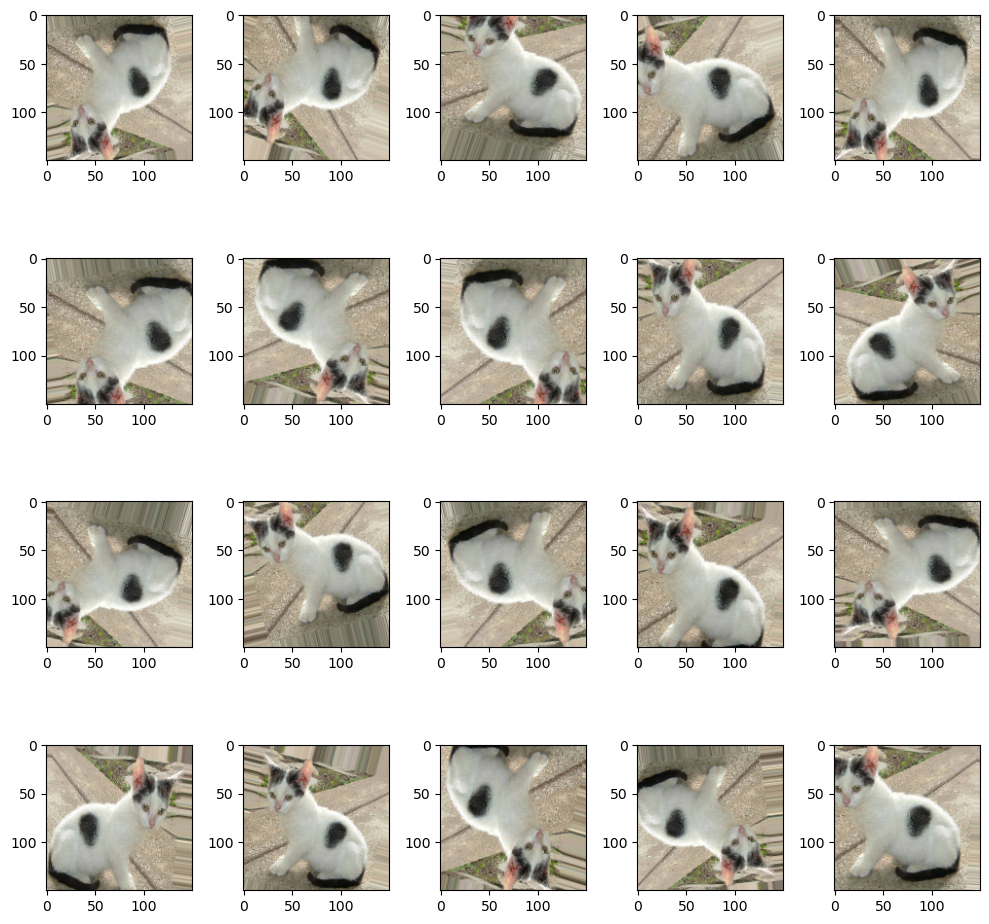

In [29]:
# 증식에 관한 예제를 하나 볼꺼예요!

# data augmentation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20,    
                             # 지정된 각도 범위내에서 임의로 원본이미지를 회전
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             # 지정된 방향 이동 범위내에서 임의로 원본이미지를 이동. 
                             # 수치는 전체 넓이의 비율(실수)                             
                             shear_range=0.1,
                             # 밀림 강도 범위내에서 임의로 원본이미지를 변형. 
                             # 수치는 시계반대방향으로 밀림 강도를 라디안으로 표시
                             zoom_range=0.1,
                             # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소. 
                             # "1-수치"부터 "1+수치"사이 범위로 확대/축소 
                             horizontal_flip=True,
                             vertical_flip=True,  
                             # 수평, 수직방향으로 뒤집기.
                             fill_mode='nearest')

img = image.load_img('./data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)  # (150,150,3)
x = x.reshape((1,) + x.shape) # (1,150,150,3)


fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    imgplot = axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break
        
fig.tight_layout()        
plt.show()    

In [30]:
# 데이터 증식 이용
# 경로 설정
train_dir = './data/cat_dog_small/train/'
validation_dir = './data/cat_dog_small/validation/'

# ImageDataGenerator 생성
# Image file을 읽어서 pixel data를 추출
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,    
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,              
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,  
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,    
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,              
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True,  
                                 fill_mode='nearest')

# ImageDataGenerator를 이용하여 폴더에서 파일을 읽어 pixel data를 생성시키는 generator 생성
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    classes=['cats', 'dogs'], # 폴더명, 먼저나온 값: 0, 나중에 나온 값:1, 생략시 폴더순(오름차순)
    target_size=(150, 150),   # Image Resize (150,150)
    batch_size=20,            # 한번에 읽어올 이미지 파일의 수, label에 상관없이 읽어옴                                                
    class_mode='binary'       # binary: 이진분류, categorical: 다중분류, sparse-: one-hot 미처리시
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir, 
    classes=['cats', 'dogs'], # 폴더명, 먼저나온 값: 0, 나중에 나온 값:1, 생략시 폴더순(오름차순)
    target_size=(150, 150),   # Image Resize (150,150)
    batch_size=20,            # 한번에 읽어올 이미지 파일의 수, label에 상관없이 읽어옴                                                
    class_mode='binary'       # binary: 이진분류, categorical: 다중분류, sparse-: one-hot 미처리시
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
# model 학습
model_result = model.fit(train_generator,
                         steps_per_epoch=100,
                         epochs=30,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 494ms/step - loss: 0.6325 - accuracy: 0.7025 - val_loss: 0.5782 - val_accuracy: 0.6810
Epoch 2/30
100/100 [==============================] - 63s 633ms/step - loss: 0.5191 - accuracy: 0.7395 - val_loss: 0.5539 - val_accuracy: 0.7100
Epoch 3/30
100/100 [==============================] - 63s 625ms/step - loss: 0.4891 - accuracy: 0.7630 - val_loss: 0.5302 - val_accuracy: 0.7350
Epoch 4/30
100/100 [==============================] - 72s 721ms/step - loss: 0.4712 - accuracy: 0.7695 - val_loss: 0.5756 - val_accuracy: 0.6800
Epoch 5/30
100/100 [==============================] - 69s 693ms/step - loss: 0.4809 - accuracy: 0.7710 - val_loss: 0.5791 - val_accuracy: 0.6900
Epoch 6/30
100/100 [==============================] - 73s 728ms/step - loss: 0.4855 - accuracy: 0.7605 - val_loss: 0.5265 - val_accuracy: 0.7250
Epoch 7/30
100/100 [==============================] - 72s 723ms/step - loss: 0.4614 - accuracy: 0.7795 - val_loss: 0.5214 - val_ac

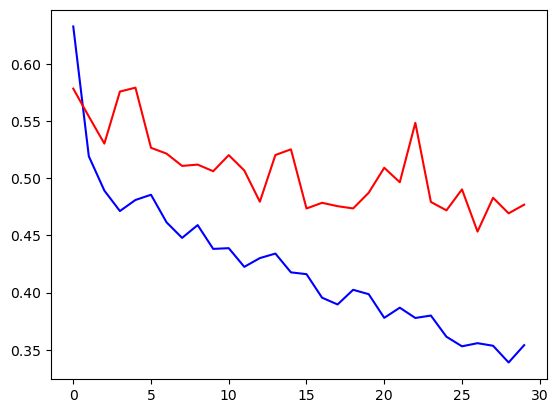

In [32]:
# history 객체를 그래프로 나타내기

plt.plot(model_result.history['loss'], color='b')
plt.plot(model_result.history['val_loss'], color='r')
plt.show()